In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sb
import pandas as pd

In [2]:
import os

In [3]:
def model_index(file_name):
    return int(file_name.split('_')[1])

In [4]:
def read_leaderboard(file_name, scale=False):
    result = []
    with open(file_name, "rt", encoding='utf-8') as fd:
        started = False
        for l in fd:
            l = l.strip()
            if not started:
                if l.startswith("Leaderboard"):
                    started = True
                continue
            name, rest = l.split(':')
            wld = map(str.strip, rest.split(','))
            win, lose, draw = map(lambda s: int(s.split('=')[1]), wld)
            # models from the last round played 40% more games, so score need to be compensated
            if scale:
                win = int(win / 1.4)
                lose = int(lose / 1.4)
                draw = int(draw / 1.4)
            result.append((os.path.basename(name), win, lose, draw))
    return result       

# Semi-final analisys

In [5]:
v1 = read_leaderboard("mu-t5-6-res2.txt")

In [6]:
v1[:10]

[('best_010_00210.dat', 339, 41, 0),
 ('best_015_00260.dat', 298, 82, 0),
 ('best_155_02510.dat', 287, 93, 0),
 ('best_150_02460.dat', 273, 107, 0),
 ('best_140_02360.dat', 267, 113, 0),
 ('best_145_02410.dat', 266, 114, 0),
 ('best_165_02640.dat', 253, 127, 0),
 ('best_005_00100.dat', 250, 130, 0),
 ('best_160_02560.dat', 236, 144, 0),
 ('best_135_02310.dat', 220, 160, 0)]

In [7]:
v1_pairs = list(map(lambda p: (model_index(p[0]), p[1] / (p[1] + p[2] + p[3])), v1))
v1_pairs.sort()

In [8]:
v1_index, v1_ratios = zip(*v1_pairs)

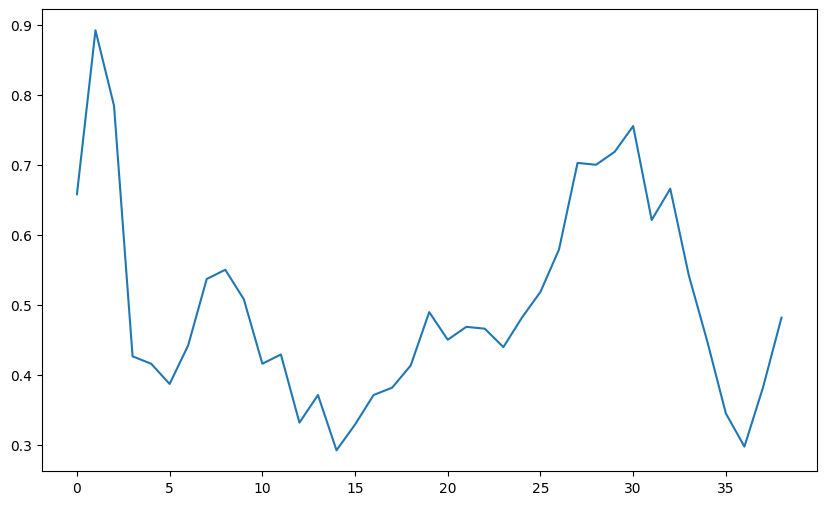

In [9]:
plt.plot(v1_ratios)

In [10]:
v1_df = pd.DataFrame(data={
    "Wall time": [0] * len(v1_index), 
    'Step': v1_index, 
    'Value': v1_ratios
})

In [11]:
v1_df.to_csv("mu-v1-wins.csv", index=None)